In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [5]:
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(254, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1) # Один нейрон, оскільки це задача регресії
])


optimizer = tf.keras.optimizers.Adam(learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.001, decay_steps=10000, decay_rate=0.9))

# L2 регуляризації
model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))

# Компіляція
model.compile(loss=tf.keras.losses.mae, optimizer=optimizer, metrics=['mae'])

# Навчання
history = model.fit(X_train, y_train, epochs=500, batch_size=64, validation_split=0.2)

# оцінка моделі
train_loss = model.evaluate(X_train, y_train, verbose=0)
print("\nTraining Loss (MAE)", train_loss)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss (MAE)", test_loss)


Epoch 1/500
14/14 [==============================] - 2s 17ms/step - loss: 13516.0947 - mae: 13516.0713 - val_loss: 12648.2041 - val_mae: 12648.1787
Epoch 2/500
14/14 [==============================] - 0s 10ms/step - loss: 13500.8281 - mae: 13500.8027 - val_loss: 12616.2305 - val_mae: 12616.2041
Epoch 3/500
14/14 [==============================] - 0s 10ms/step - loss: 13435.5674 - mae: 13435.5400 - val_loss: 12489.2256 - val_mae: 12489.1982
Epoch 4/500
14/14 [==============================] - 0s 10ms/step - loss: 13201.1152 - mae: 13201.0879 - val_loss: 12065.9170 - val_mae: 12065.8867
Epoch 5/500
14/14 [==============================] - 0s 9ms/step - loss: 12493.8945 - mae: 12493.8643 - val_loss: 10964.2061 - val_mae: 10964.1738
Epoch 6/500
14/14 [==============================] - 0s 10ms/step - loss: 11096.6328 - mae: 11096.6006 - val_loss: 9913.0400 - val_mae: 9913.0059
Epoch 7/500
14/14 [==============================] - 0s 9ms/step - loss: 10525.5537 - mae: 10525.5186 - val_loss: 9

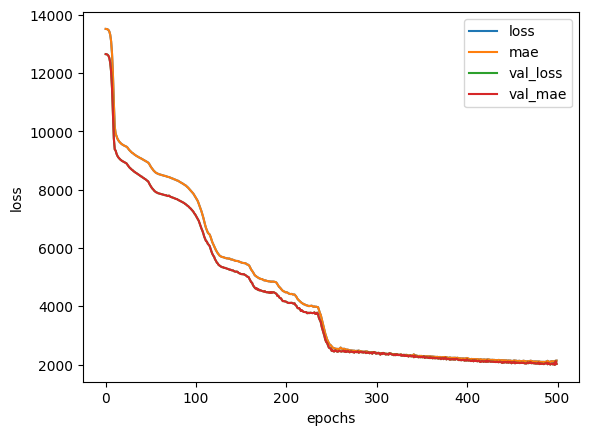

In [16]:
# крива втрат
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");